In [108]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.externals import joblib
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from xgboost import XGBRegressor, plot_importance
from matplotlib import pyplot

from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import seaborn as sns

In [109]:
parser = lambda date: pd.to_datetime(date, format='%d.%m.%Y')

train = pd.read_csv('../input/train.csv', parse_dates=['date'], date_parser=parser)
test = pd.read_csv('../input/test.csv')
items = pd.read_csv('../input/items.csv')
item_cats = pd.read_csv('../input/item_categories.csv')
shops = pd.read_csv('../input/shops.csv')

In [110]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
0,2014-12-28,23,25,12179,959.000000,NaN,2317582
1,2014-04-23,15,25,14042,149.000000,1.0,1576962
2,2014-03-03,14,12,11373,106.615385,13.0,1547382
3,2013-12-08,11,47,12107,599.000000,1.0,1255724
4,2015-01-23,24,29,3341,2599.000000,1.0,2372492


In [111]:
test.head()

,date,date_block_num,shop_id,item_id,item_price,ID
0,06.02.2015,25,31,11208,699.0,2472142
1,21.11.2013,10,31,19525,149.0,1044690
2,03.01.2015,24,42,16169,299.0,2367559
3,18.07.2014,18,42,2737,199.0,1793501
4,13.04.2014,15,2,15229,1199.0,1585639


In [112]:

num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)
print ('number of shops: ',shops['shop_id'].unique())

number of month:  33
size of train:  (2925849, 7)
number of shops:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [113]:
check = train
check = check.loc[check['shop_id'] == 31]
check = check.loc[check['item_id'] == 11208]
check



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
364152,2015-01-29,24,31,11208,629.00,3.0,2380339
532524,2015-01-30,24,31,11208,664.00,2.0,2380341
667795,2015-02-13,25,31,11208,699.00,1.0,2472140
955226,2015-02-09,25,31,11208,699.00,1.0,2472141
1197256,2015-03-01,26,31,11208,699.00,1.0,2542592
1282058,2015-03-27,26,31,11208,699.00,1.0,2542594
1549258,2015-02-14,25,31,11208,699.00,1.0,2472139
2056871,2015-02-03,25,31,11208,699.00,1.0,2472143
2130683,2015-02-17,25,31,11208,699.00,1.0,2472138
2211293,2015-03-10,26,31,11208,699.00,1.0,2542593


In [114]:
check = check.sort_values(by="date")

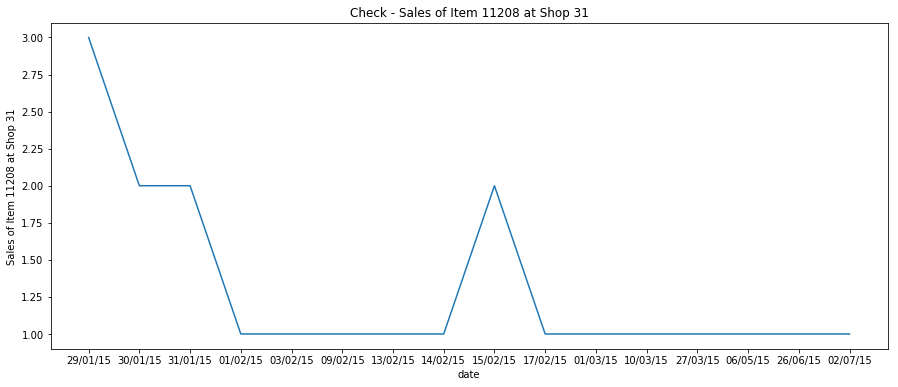

In [124]:
plt.figure(figsize=(15,6))
plt.title('Check - Sales of Item 11208 at Shop 31')
plt.xlabel('date')
plt.ylabel('Sales of Item 11208 at Shop 31')
dates = check.date.apply(lambda x: x.strftime('%d/%m/%y'))
plt.plot(dates,check["item_cnt_day"]);

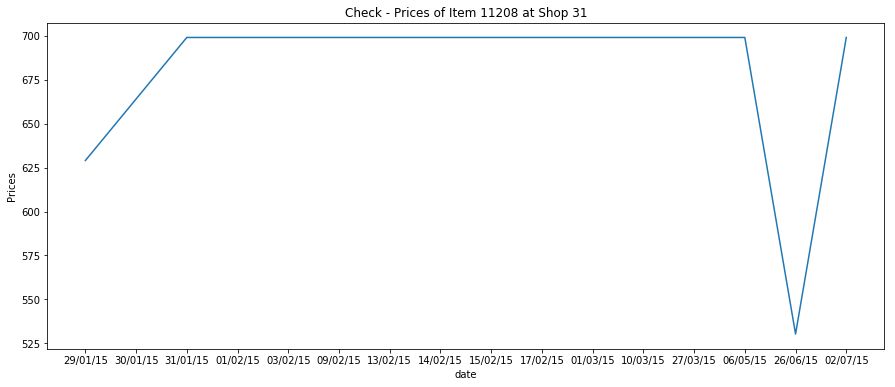

In [125]:
plt.figure(figsize=(15,6))
plt.title('Check - Prices of Item 11208 at Shop 31')
plt.xlabel('date')
plt.ylabel('Prices')
dates = check.date.apply(lambda x: x.strftime('%d/%m/%y'))
plt.plot(dates,check["item_price"]);